Dissertation
    
# **Notebook 7C: Clustering Ascending LSOAs**
    
This notebook will cluster NC derieved ascending LSOAs using just creative and cultural domains.

***

In [1]:
# Load packages

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point
from matplotlib_scalebar.scalebar import ScaleBar

In [2]:
# Look at working dir

print("The working directory is " + os.getcwd())

The working directory is /home/jovyan/work/OneDrive/UCL/Dissertation/Notebooks V3


In [3]:
shapefiles = os.path.join("Shapefiles")

profiles = os.path.join("LSOA Profiles")

clean = os.path.join("Cleaned data")

nc = os.path.join("Data", "Now-Casting")

In [4]:
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

In [5]:
def checkpoi(df1, df2):
    if len(df1) == len(df2.columns):
        print("All POI categories are there")
    else:
        x = len(df1) - len(df2.columns) 
        print("There are " + str(x) + " POI categories missing")

In [6]:
def missing(df1, df2):

    collist1 = df1.columns.to_list()
    #collist2 = df2.columns.to_list()
    
    first_set = set(collist1)
    sec_set = set(df2)
# Get the differences between two sets
    differences = (first_set - sec_set).union(sec_set - first_set)
    print('Differences between two lists: ')
    print(differences)

# 1. Read in level 1 ASC catsm

In [7]:
Level1Cat = pd.read_csv(os.path.join(clean, "Level1_nc.csv"))

In [8]:
Level1Cat = Level1Cat.drop(["Unnamed: 0"], axis=1).rename(columns={"LSOA11CD_nc":"LSOA11CD"})

In [9]:
Level1Cat

,LSOA11CD,LSOA11NM_nc,Score_2014_nc,Score_2018_nc,Rank_2014_nc,Rank_2018_nc,Rank_chg_nc,Z_score_nc,score_chg_nc,Level1Cat_nc,geometry_nc
0,E01023972,Ashford 006A,-1.393448,-0.654943,828.0,755.0,73.0,0.634257,0.738505,STB,"POLYGON ((602494.344 141509.244, 602498.426 14..."
1,E01023973,Ashford 005A,-1.615431,-1.086909,869.0,857.0,12.0,0.104261,0.528522,STB,"POLYGON ((601527.62 141293.178, 601527.125 141..."
2,E01023974,Ashford 007A,-1.727020,-0.925064,885.0,831.0,54.0,0.469176,0.801956,STB,"POLYGON ((599609.242 141534.213, 599612.382 14..."
3,E01023975,Ashford 007B,-1.136569,-0.858837,741.0,814.0,-73.0,-0.634257,0.277733,STB,"POLYGON ((599541.509 141383.033, 599540.728 14..."
4,E01023976,Ashford 008A,-1.213908,-0.730389,768.0,781.0,-13.0,-0.112950,0.483519,STB,"POLYGON ((600185.589 141361.026, 600187.479000..."
...,...,...,...,...,...,...,...,...,...,...,...
897,E01033211,Dover 012F,-1.725016,-1.452469,883.0,893.0,-10.0,-0.086884,0.272547,STB,"POLYGON ((631998.105 141862.895, 632000 141861..."
898,E01033212,Shepway 014C,-1.648224,-1.160808,875.0,866.0,9.0,0.078196,0.487415,STB,"POLYGON ((622628.323 135841.733, 622619.469 13..."
899,E01033213,Shepway 002E,-0.698191,-0.786549,559.0,799.0,-240.0,-2.085228,-0.088358,DEC,"POLYGON ((620229.159 139097.666, 620229.125 13..."
900,E01033214,Shepway 002F,-0.901772,0.056952,649.0,488.0,161.0,1.398840,0.958725,ASC,"POLYGON ((620865.861 139274.269, 620856.245 13..."


# 1. POI

1.1 2014

In [10]:
# Read in 

poi_2014 = pd.read_csv(os.path.join(nc, "poi_2014_cleaned.csv"))

In [11]:
# Drop column

poi_2014 = poi_2014.drop("Unnamed: 0", axis=1)

In [12]:
# Strip suffix

poi_2014.columns = poi_2014.columns.str.rstrip('_2014')

# Make lowercase

poi_2014.columns = map(str.lower, poi_2014.columns)

1.2 2018

In [13]:
poi_2018 = pd.read_csv(os.path.join(nc, "poi_2018_cleaned.csv"))

In [14]:
# Drop column

poi_2018 = poi_2018.drop("Unnamed: 0", axis=1)

In [15]:
# Strip suffix

poi_2018.columns = poi_2018.columns.str.rstrip('_2018')

# Make lowercase

poi_2018.columns = map(str.lower, poi_2018.columns)

# 2. Make Indicies

In [16]:
hotels = ["LSOA11CD",
    "bed_and_breakfast_and_backpacker_accommodation",
"self_catering",
"camping,_caravanning,_mobile_homes,_holiday_parks_and_centres",
"hostels_and_refuges_for_the_homeless",
"youth_accommodation",
"hotels,_motels,_country_houses_and_inns"]

cultural_activites = ["LSOA11CD","aquaria_and_sea_life_centres",
"horticultural_attractions",
"bird_reserves,_collections_and_sanctuaries",
"butterfly_farms",
"zoos_and_animal_collections",
"farm_based_attractions",
"art_galleries",
"museums",
 "cinemas",
"theatres_and_concert_halls", 
"siteseeing,_tours,_viewing_and_visitor_centres",
"laseria,_observatories_and_planetaria",
"theme_and_adventure_parks",
"model_villages",
"unspecified_and_other_attractions",
"railways_(heritage,_steam_and_miniature)"]
                      
children = ["LSOA11CD",
"children's_activity_centres",
"funfair_services",
"theme_and_adventure_parks",
"railways_(heritage,_steam_and_miniature)",
"playgrounds",
"baby,_nursery_and_playground_equipment",
"ballet_and_dance_schools",
"language_schools",
"music_teachers_and_schools",
"broad_age_range_and_secondary_state_schools",
"independent_and_preparatory_schools",
"first,_primary_and_infant_schools"]                     
                      
entertainment = [  "LSOA11CD",                   
"nightclubs",                  
"discos"]

creative = ["LSOA11CD","artists,_illustrators_and_calligraphers",
"concert/exhibition_organisers_and_services",
"plate_makers,_print_finishers_and_type_setters",
"recording_studios_and_record_companies",
"film_and_video_services",
"television_and_radio_services",
"astrologers,_clairvoyants_and_palmists",
"printing_on_garments",
"sculptors,_wood_workers_and_stone_masons",
"musicians,_orchestras_and_composers",
"art_and_antiques"
]

building = ["LSOA11CD","building_and_component_suppliers",
"glaziers",
"building_contractors",
"metalworkers_including_blacksmiths",
"construction_completion_services",
"painting_and_decorating_services",
"construction_plant",
"plasterers",
"cutting,_drilling__and_welding_services",
"plumbing_and_heating_services",
"demolition_services",
"pool_and_court_construction",
"restoration_and_preservation_services",
"electrical_contractors",
"fencing_and_drystone_walling_services",
"roofing_and_chimney_services",
"building_repairs"]

infrastructure = ["LSOA11CD","wifi_hotspots",
"cash_machines",
"paypoint_locations",
"commons",
"picnic_areas",
"country_and_national_parks",
"playgrounds",
"gardens",
"designated_scenic_features",
"trigonometric_points",
"public_toilets",
"drinking_fountains_and_water_points",
"letter_boxes",
"baby,_nursery_and_playground_equipment",
"taxi_ranks",
"tram,_metro_and_light_railway_stations_and_stops",
"railway_stations,_junctions_and_halts",
"bus_transport",
"bus_stops",
"hail_and_ride_zones",
'bus_stops',
 'bus_and_coach_stations,_depots_and_companies',]

age = ["LSOA11CD","pension_and_fund_management",
"financial_advice_services", 
"funeral_and_associated_services",
]

leisure_services = ["LSOA11CD","feng_shui_consultants,_furnishers_and_shop_fitters",
"spas",
"cleaning_services",
"hair_and_beauty_services",
"tailoring_and_clothing_alteration",
"trophies_and_engraving_services",
"introduction_and_dating_agencies",
"vehicle_cleaning_services",
"wedding_services",
"window_cleaners",
"boat_hiring_services",
"bouncy_castles_and_inflatables_hire",
"renting_and_leasing_of_personal_and_household_goods",
"clothing_hire",
"sound,_light_and_vision_service_and_equipment_hire",
"construction_and_tool_hire",
"vehicle_hire_and_rental",
"animal_clipping_and_grooming",
"pet_cemeteries_and_crematoria",
"dog_training",
"veterinarians_and_animal_hospitals",
"horse_training",
"veterinary_pharmacies",
"kennels_and_catteries",
"alternative,_natural_and_complementary",
"homeopaths",
"ballet_and_dance_schools",
"language_schools",
"music_teachers_and_schools",
"driving_and_motorcycle_schools",
"florists"]

property_services = ["LSOA11CD",
"commercial_property_letting",
"property_information_services",
"estate_and_property_management",
"property_letting",
"property_development_services",
"property_sales"
]

wifi = ["LSOA11CD","wifi_hotspots"]

eateries_gent = ["LSOA11CD","cafes,_snack_bars_and_tea_rooms",
"restaurants",
"restaurants", 
"green_and_new_age_goods",
"bakeries",
"grocers,_farm_shops_and_pick_your_own",  
"convenience_stores_and_independent_supermarkets",
"organic,_health,_gourmet_and_kosher_foods",
"delicatessens"]

eateries = ["LSOA11CD","eating_and_drinking",
"banqueting_and_function_rooms",
"fish_and_chip_shops",
"cafes,_snack_bars_and_tea_rooms",
"cafes",
"fast_food_and_takeaway_outlets",
"pubs,_bars_and_inns",
"fast_food_delivery_services",
"restaurants",
"restaurants",
"alcoholic_drinks_including_off_licences_and_wholesalers",
"green_and_new_age_goods",
"bakeries",
"grocers,_farm_shops_and_pick_your_own",
"herbs_and_spices",
"convenience_stores_and_independent_supermarkets",
"organic,_health,_gourmet_and_kosher_foods",
"delicatessens",
"tea_and_coffee_merchants",
"alcoholic_drinks",
"baking_and_confectionery",
"catering_and_non_specific_food_products",
"non_alcoholic_drinks"]

In [17]:
poi_2014 = poi_2014.rename(columns={"lsoa11cd":"LSOA11CD"})
poi_2018 = poi_2018.rename(columns={"lsoa11cd":"LSOA11CD"})

In [18]:
# Hotels

poi_2014_hotels =  poi_2014.filter(items=hotels)
poi_2018_hotels =  poi_2018.filter(items=hotels)

checkpoi(hotels, poi_2014_hotels)
missing(poi_2014_hotels, hotels)

checkpoi(hotels, poi_2018_hotels)
missing(poi_2018_hotels, hotels)

# Calculate count 
poi_2014_hotels["count"] = poi_2014_hotels.iloc[:, 1:].sum(axis = 1)
poi_2018_hotels["count"] = poi_2018_hotels.iloc[:, 1:].sum(axis = 1)

# Calculate percent of all POIs
poi_2014_hotels["prop_2014_hotels"] = poi_2014_hotels["count"]/poi_2014["count_poi"]
poi_2018_hotels["prop_2018_hotels"] = poi_2018_hotels["count"]/poi_2018["count_poi"]

# Filter
poi_2014_hotels = poi_2014_hotels[["LSOA11CD", "prop_2014_hotels"]]
poi_2018_hotels = poi_2018_hotels[["LSOA11CD", "prop_2018_hotels"]]

hotels = pd.merge(poi_2014_hotels, poi_2018_hotels, on="LSOA11CD")

All POI categories are there
Differences between two lists: 
set()
All POI categories are there
Differences between two lists: 
set()


In [19]:
# cultural_activites

poi_2014_cultural_activites =  poi_2014.filter(items=cultural_activites)
poi_2018_cultural_activites =  poi_2018.filter(items=cultural_activites)

checkpoi(cultural_activites, poi_2014_cultural_activites)
missing(poi_2014_cultural_activites, cultural_activites)

checkpoi(cultural_activites, poi_2018_cultural_activites)
missing(poi_2018_cultural_activites, cultural_activites)

# Calculate count 
poi_2014_cultural_activites["count"] = poi_2014_cultural_activites.iloc[:, 1:].sum(axis = 1)
poi_2018_cultural_activites["count"] = poi_2018_cultural_activites.iloc[:, 1:].sum(axis = 1)

# Calculate percent of all POIs
poi_2014_cultural_activites["prop_2014_cultural_activites"] = poi_2014_cultural_activites["count"]/poi_2014["count_poi"]
poi_2018_cultural_activites["prop_2018_cultural_activites"] = poi_2018_cultural_activites["count"]/poi_2018["count_poi"]

# Filter
poi_2014_cultural_activites = poi_2014_cultural_activites[["LSOA11CD", "prop_2014_cultural_activites"]]
poi_2018_cultural_activites = poi_2018_cultural_activites[["LSOA11CD", "prop_2018_cultural_activites"]]

cultural_activites = pd.merge(poi_2014_cultural_activites, poi_2018_cultural_activites, on="LSOA11CD")

There are 2 POI categories missing
Differences between two lists: 
{'aquaria_and_sea_life_centres', 'laseria,_observatories_and_planetaria'}
There are 4 POI categories missing
Differences between two lists: 
{'butterfly_farms', 'aquaria_and_sea_life_centres', 'laseria,_observatories_and_planetaria', 'model_villages'}


In [20]:
# children

poi_2014_children =  poi_2014.filter(items=children)
poi_2018_children =  poi_2018.filter(items=children)

checkpoi(children, poi_2014_children)
missing(poi_2014_children, children)

checkpoi(children, poi_2018_children)
missing(poi_2018_children, children)

# Calculate count 
poi_2014_children["count"] = poi_2014_children.iloc[:, 1:].sum(axis = 1)
poi_2018_children["count"] = poi_2018_children.iloc[:, 1:].sum(axis = 1)

# Calculate percent of all POIs
poi_2014_children["prop_2014_children"] = poi_2014_children["count"]/poi_2014["count_poi"]
poi_2018_children["prop_2018_children"] = poi_2018_children["count"]/poi_2018["count_poi"]

# Filter
poi_2014_children = poi_2014_children[["LSOA11CD", "prop_2014_children"]]
poi_2018_children = poi_2018_children[["LSOA11CD", "prop_2018_children"]]

children = pd.merge(poi_2014_children, poi_2018_children, on="LSOA11CD")

There are 1 POI categories missing
Differences between two lists: 
{'funfair_services'}
There are 1 POI categories missing
Differences between two lists: 
{'funfair_services'}


In [21]:
# entertainment

poi_2014_entertainment =  poi_2014.filter(items=entertainment)
poi_2018_entertainment =  poi_2018.filter(items=entertainment)

checkpoi(entertainment, poi_2014_entertainment)
missing(poi_2014_entertainment, entertainment)

checkpoi(entertainment, poi_2018_entertainment)
missing(poi_2018_entertainment, entertainment)

# Calculate count 
poi_2014_entertainment["count"] = poi_2014_entertainment.iloc[:, 1:].sum(axis = 1)
poi_2018_entertainment["count"] = poi_2018_entertainment.iloc[:, 1:].sum(axis = 1)

# Calculate percent of all POIs
poi_2014_entertainment["prop_2014_entertainment"] = poi_2014_entertainment["count"]/poi_2014["count_poi"]
poi_2018_entertainment["prop_2018_entertainment"] = poi_2018_entertainment["count"]/poi_2018["count_poi"]

# Filter
poi_2014_entertainment = poi_2014_entertainment[["LSOA11CD", "prop_2014_entertainment"]]
poi_2018_entertainment = poi_2018_entertainment[["LSOA11CD", "prop_2018_entertainment"]]

#entertainment = pd.merge(poi_2014_entertainment, poi_2018_entertainment, on="LSOA11CD")
# Dropped as mostly 0


All POI categories are there
Differences between two lists: 
set()
All POI categories are there
Differences between two lists: 
set()


In [22]:
# _creative

poi_2014_creative =  poi_2014.filter(items=creative)
poi_2018_creative =  poi_2018.filter(items=creative)

checkpoi(creative, poi_2014_creative)
missing(poi_2014_creative, creative)

checkpoi(creative, poi_2018_creative)
missing(poi_2018_creative, creative)

# Calculate count 
poi_2014_creative["count"] = poi_2014_creative.iloc[:, 1:].sum(axis = 1)
poi_2018_creative["count"] = poi_2018_creative.iloc[:, 1:].sum(axis = 1)

# Calculate percent of all POIs
poi_2014_creative["prop_2014_creative"] = poi_2014_creative["count"]/poi_2014["count_poi"]
poi_2018_creative["prop_2018_creative"] = poi_2018_creative["count"]/poi_2018["count_poi"]

# Filter
poi_2014_creative = poi_2014_creative[["LSOA11CD", "prop_2014_creative"]]
poi_2018_creative = poi_2018_creative[["LSOA11CD", "prop_2018_creative"]]

creative = pd.merge(poi_2014_creative, poi_2018_creative, on="LSOA11CD")

All POI categories are there
Differences between two lists: 
set()
There are 1 POI categories missing
Differences between two lists: 
{'printing_on_garments'}


In [23]:
# building

poi_2014_building =  poi_2014.filter(items=building)
poi_2018_building =  poi_2018.filter(items=building)

checkpoi(building, poi_2014_building)
missing(poi_2014_building, building)

checkpoi(building, poi_2018_building)
missing(poi_2018_building, building)

# Calculate count 
poi_2014_building["count"] = poi_2014_building.iloc[:, 1:].sum(axis = 1)
poi_2018_building["count"] = poi_2018_building.iloc[:, 1:].sum(axis = 1)

# Calculate percent of all POIs
poi_2014_building["prop_2014_building"] = poi_2014_building["count"]/poi_2014["count_poi"]
poi_2018_building["prop_2018_building"] = poi_2018_building["count"]/poi_2018["count_poi"]

# Filter
poi_2014_building = poi_2014_building[["LSOA11CD", "prop_2014_building"]]
poi_2018_building = poi_2018_building[["LSOA11CD", "prop_2018_building"]]

building = pd.merge(poi_2014_building, poi_2018_building, on="LSOA11CD")

All POI categories are there
Differences between two lists: 
set()
All POI categories are there
Differences between two lists: 
set()


In [24]:
# infrastructure

poi_2014_infrastructure =  poi_2014.filter(items=infrastructure)
poi_2018_infrastructure =  poi_2018.filter(items=infrastructure)

checkpoi(infrastructure, poi_2014_infrastructure)
missing(poi_2014_infrastructure, infrastructure)

checkpoi(infrastructure, poi_2018_infrastructure)
missing(poi_2018_infrastructure, infrastructure)

# Calculate count 
poi_2014_infrastructure["count"] = poi_2014_infrastructure.iloc[:, 1:].sum(axis = 1)
poi_2018_infrastructure["count"] = poi_2018_infrastructure.iloc[:, 1:].sum(axis = 1)

# Calculate percent of all POIs
poi_2014_infrastructure["prop_2014_infrastructure"] = poi_2014_infrastructure["count"]/poi_2014["count_poi"]
poi_2018_infrastructure["prop_2018_infrastructure"] = poi_2018_infrastructure["count"]/poi_2018["count_poi"]

# Filter
poi_2014_infrastructure = poi_2014_infrastructure[["LSOA11CD", "prop_2014_infrastructure"]]
poi_2018_infrastructure = poi_2018_infrastructure[["LSOA11CD", "prop_2018_infrastructure"]]

infrastructure = pd.merge(poi_2014_infrastructure, poi_2018_infrastructure, on="LSOA11CD")

There are 3 POI categories missing
Differences between two lists: 
{'tram,_metro_and_light_railway_stations_and_stops', 'bus_transport', 'gardens'}
There are 3 POI categories missing
Differences between two lists: 
{'tram,_metro_and_light_railway_stations_and_stops', 'bus_transport', 'gardens'}


In [25]:
# age

poi_2014_age =  poi_2014.filter(items=age)
poi_2018_age =  poi_2018.filter(items=age)

checkpoi(age, poi_2014_age)
missing(poi_2014_age, age)

checkpoi(age, poi_2018_age)
missing(poi_2018_age, age)

# Calculate count 
poi_2014_age["count"] = poi_2014_age.iloc[:, 1:].sum(axis = 1)
poi_2018_age["count"] = poi_2018_age.iloc[:, 1:].sum(axis = 1)

# Calculate percent of all POIs
poi_2014_age["prop_2014_age"] = poi_2014_age["count"]/poi_2014["count_poi"]
poi_2018_age["prop_2018_age"] = poi_2018_age["count"]/poi_2018["count_poi"]

# Filter
poi_2014_age = poi_2014_age[["LSOA11CD", "prop_2014_age"]]
poi_2018_age = poi_2018_age[["LSOA11CD", "prop_2018_age"]]

age = pd.merge(poi_2014_age, poi_2018_age, on="LSOA11CD")

All POI categories are there
Differences between two lists: 
set()
All POI categories are there
Differences between two lists: 
set()


In [26]:
# leisure_services

poi_2014_leisure_services =  poi_2014.filter(items=leisure_services)
poi_2018_leisure_services =  poi_2018.filter(items=leisure_services)

checkpoi(leisure_services, poi_2014_leisure_services)
missing(poi_2014_leisure_services, leisure_services)

checkpoi(leisure_services, poi_2018_leisure_services)
missing(poi_2018_leisure_services, leisure_services)

# Calculate count 
poi_2014_leisure_services["count"] = poi_2014_leisure_services.iloc[:, 1:].sum(axis = 1)
poi_2018_leisure_services["count"] = poi_2018_leisure_services.iloc[:, 1:].sum(axis = 1)

# Calculate percent of all POIs
poi_2014_leisure_services["prop_2014_leisure_services"] = poi_2014_leisure_services["count"]/poi_2014["count_poi"]
poi_2018_leisure_services["prop_2018_leisure_services"] = poi_2018_leisure_services["count"]/poi_2018["count_poi"]

# Filter
poi_2014_leisure_services = poi_2014_leisure_services[["LSOA11CD", "prop_2014_leisure_services"]]
poi_2018_leisure_services = poi_2018_leisure_services[["LSOA11CD", "prop_2018_leisure_services"]]

leisure_services = pd.merge(poi_2014_leisure_services, poi_2018_leisure_services, on="LSOA11CD")

All POI categories are there
Differences between two lists: 
set()
All POI categories are there
Differences between two lists: 
set()


In [27]:
# property_services

poi_2014_property_services =  poi_2014.filter(items=property_services)
poi_2018_property_services =  poi_2018.filter(items=property_services)

checkpoi(property_services, poi_2014_property_services)
missing(poi_2014_property_services, property_services)

checkpoi(property_services, poi_2018_property_services)
missing(poi_2018_property_services, property_services)

# Calculate count 
poi_2014_property_services["count"] = poi_2014_property_services.iloc[:, 1:].sum(axis = 1)
poi_2018_property_services["count"] = poi_2018_property_services.iloc[:, 1:].sum(axis = 1)

# Calculate percent of all POIs
poi_2014_property_services["prop_2014_property_services"] = poi_2014_property_services["count"]/poi_2014["count_poi"]
poi_2018_property_services["prop_2018_property_services"] = poi_2018_property_services["count"]/poi_2018["count_poi"]

# Filter
poi_2014_property_services = poi_2014_property_services[["LSOA11CD", "prop_2014_property_services"]]
poi_2018_property_services = poi_2018_property_services[["LSOA11CD", "prop_2018_property_services"]]

property_services = pd.merge(poi_2014_property_services, poi_2018_property_services, on="LSOA11CD")

All POI categories are there
Differences between two lists: 
set()
All POI categories are there
Differences between two lists: 
set()


In [28]:
# property_services

poi_2014_eateries_gent =  poi_2014.filter(items=eateries_gent)
poi_2018_eateries_gent =  poi_2018.filter(items=eateries_gent)

checkpoi(eateries_gent, poi_2014_eateries_gent)
missing(poi_2014_eateries_gent, eateries_gent)

checkpoi(eateries_gent, poi_2018_eateries_gent)
missing(poi_2018_eateries_gent, eateries_gent)

# Calculate count 
poi_2014_eateries_gent["count"] = poi_2014_eateries_gent.iloc[:, 1:].sum(axis = 1)
poi_2018_eateries_gent["count"] = poi_2018_eateries_gent.iloc[:, 1:].sum(axis = 1)

# Calculate percent of all POIs
poi_2014_eateries_gent["prop_2014_eateries"] = poi_2014_eateries_gent["count"]/poi_2014["count_poi"]
poi_2018_eateries_gent["prop_2018_eateries"] = poi_2018_eateries_gent["count"]/poi_2018["count_poi"]

# Filter
poi_2014_eateries_gent = poi_2014_eateries_gent[["LSOA11CD", "prop_2014_eateries"]]
poi_2018_eateries_gent = poi_2018_eateries_gent[["LSOA11CD", "prop_2018_eateries"]]

eateries = pd.merge(poi_2014_eateries_gent, poi_2018_eateries_gent, on="LSOA11CD")

All POI categories are there
Differences between two lists: 
set()
All POI categories are there
Differences between two lists: 
set()


In [29]:
# Create df

lsoa_2011 = gpd.read_file(os.path.join("shapefiles", "LSOA_KENT_2011.shp"))

In [30]:
dfs = [hotels, cultural_activites, children, creative, building, infrastructure, age, leisure_services, property_services, eateries]

for d in dfs:
    lsoa_2011 = pd.merge(lsoa_2011, d, on="LSOA11CD", how="left")
    
#lsoa_2011 = lsoa_2011.drop(['prop_2014_entertainment_y'], axis=1).rename(columns={"prop_2014_entertainment_x":"prop_2014_entertainment"})

# 2. Population Churn

In [31]:
pop_churn = pd.read_csv(os.path.join(nc, "pop_churn.csv" ))

In [32]:
pop_churn_kent = pd.merge(Level1Cat, pop_churn, how="left", left_on="LSOA11CD", right_on="area")

In [33]:
pop_churn_kent =  pop_churn_kent.set_index("LSOA11CD")

In [34]:
pop_churn_kent_14_18 = pop_churn_kent.iloc[:, 28:33]

In [35]:
pop_churn_kent_14_18["average_churn"] = pop_churn_kent_14_18.mean(axis=1)

In [36]:
pop_churn_kent_14_18 = pop_churn_kent_14_18.reset_index()

In [37]:
pop_churn_kent_14_18

,LSOA11CD,chn2014,chn2015,chn2016,chn2017,chn2018,average_churn
0,E01023972,0.132,0.108,0.082,0.058,0.033,0.0826
1,E01023973,0.203,0.166,0.133,0.093,0.049,0.1288
2,E01023974,0.159,0.131,0.098,0.068,0.036,0.0984
3,E01023975,0.186,0.160,0.131,0.091,0.049,0.1234
4,E01023976,0.144,0.118,0.089,0.061,0.031,0.0886
...,...,...,...,...,...,...,...
897,E01033211,0.207,0.174,0.132,0.079,0.038,0.1260
898,E01033212,0.318,0.267,0.191,0.102,0.048,0.1852
899,E01033213,0.227,0.186,0.141,0.091,0.045,0.1380
900,E01033214,0.211,0.184,0.142,0.090,0.046,0.1346


In [38]:
pop_churn_kent_14_18 = pop_churn_kent_14_18[["LSOA11CD", "average_churn"]]

In [39]:
lsoa_2011 = pd.merge(lsoa_2011, pop_churn_kent_14_18, on="LSOA11CD", how="left")

# 4. Internet Users

In [40]:
iuc = gpd.read_file(os.path.join(nc, "IUC2018.shp"))

In [41]:
# Clip

iuc_kent = pd.merge(lsoa_2011, iuc, left_on="LSOA11CD", right_on= "LSOA11_CD", how="left")

In [42]:
iuc_kent = iuc_kent[['LSOA11CD', 'GRP_LABEL']]

In [43]:
# Merge

lsoa_2011 = pd.merge(lsoa_2011, iuc_kent, on="LSOA11CD", how="left")

# 5. Building Ages

In [44]:
building_age = pd.read_csv(os.path.join(nc, "voapropertyage.csv"))

In [45]:
# Clip

building_age_kent = pd.merge(lsoa_2011, building_age, left_on="LSOA11CD", right_on = "AREA_CODE", how="left")

In [46]:
building_age_kent["new_builds_pro"] = building_age_kent["BP_2010_2015"]/(building_age_kent.iloc[:,27:39].sum(axis=1))

In [47]:
building_age_kent = building_age_kent[["LSOA11CD", "new_builds_pro"]]

In [48]:
lsoa_2011 = pd.merge(lsoa_2011, building_age_kent, left_on="LSOA11CD", right_on = "LSOA11CD", how="left")

# 6. Calculate changes

In [49]:
lsoa_2011.columns.to_list()

['LSOA11CD',
 'LSOA11NM',
 'geometry',
 'prop_2014_hotels',
 'prop_2018_hotels',
 'prop_2014_cultural_activites',
 'prop_2018_cultural_activites',
 'prop_2014_children',
 'prop_2018_children',
 'prop_2014_creative',
 'prop_2018_creative',
 'prop_2014_building',
 'prop_2018_building',
 'prop_2014_infrastructure',
 'prop_2018_infrastructure',
 'prop_2014_age',
 'prop_2018_age',
 'prop_2014_leisure_services',
 'prop_2018_leisure_services',
 'prop_2014_property_services',
 'prop_2018_property_services',
 'prop_2014_eateries',
 'prop_2018_eateries',
 'average_churn',
 'GRP_LABEL',
 'new_builds_pro']

In [50]:
def percent_change(before, after):
    x = (after-before)
    return(x)

In [51]:
lsoa_2011["hotel_change"] = percent_change(lsoa_2011["prop_2014_hotels"],lsoa_2011["prop_2018_hotels"] )
lsoa_2011["cultural_change"] = percent_change(lsoa_2011["prop_2014_cultural_activites"],lsoa_2011["prop_2018_cultural_activites"] )
lsoa_2011["children_change"] = percent_change(lsoa_2011["prop_2014_children"],lsoa_2011["prop_2018_children"] )
#lsoa_2011["entertainment_change"] = percent_change(lsoa_2011["prop_2014_entertainment"],lsoa_2011["prop_2014_entertainment"] )
lsoa_2011["creative_change"] = percent_change(lsoa_2011["prop_2014_creative"],lsoa_2011["prop_2018_creative"] )
lsoa_2011["building_change"] = percent_change(lsoa_2011["prop_2014_building"],lsoa_2011["prop_2018_building"] )
lsoa_2011["infrastructure_change"] = percent_change(lsoa_2011["prop_2014_infrastructure"],lsoa_2011["prop_2018_infrastructure"] )
lsoa_2011["age_change"] = percent_change(lsoa_2011["prop_2014_age"],lsoa_2011["prop_2018_age"] )
lsoa_2011["leisure_change"] = percent_change(lsoa_2011["prop_2014_leisure_services"],lsoa_2011["prop_2018_leisure_services"] )
lsoa_2011["property_change"] = percent_change(lsoa_2011["prop_2014_property_services"],lsoa_2011["prop_2018_property_services"] )
lsoa_2011["eateries_change"] = percent_change(lsoa_2011["prop_2014_eateries"],lsoa_2011["prop_2018_eateries"] )



In [52]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(lsoa_2011.head(1))


    LSOA11CD      LSOA11NM                                           geometry  \
0  E01023972  Ashford 006A  POLYGON ((602494.344 141509.244, 602498.426 14...   

   prop_2014_hotels  prop_2018_hotels  prop_2014_cultural_activites  \
0               0.0               0.0                           0.0   

   prop_2018_cultural_activites  prop_2014_children  prop_2018_children  \
0                           0.0            0.038462            0.033333   

   prop_2014_creative  prop_2018_creative  prop_2014_building  \
0                 0.0            0.033333            0.038462   

   prop_2018_building  prop_2014_infrastructure  prop_2018_infrastructure  \
0            0.033333                  0.730769                       0.6   

   prop_2014_age  prop_2018_age  prop_2014_leisure_services  \
0            0.0            0.0                    0.076923   

   prop_2018_leisure_services  prop_2014_property_services  \
0                    0.066667                     0.038462   

   pr

In [53]:
lsoa_2011.columns

Index(['LSOA11CD', 'LSOA11NM', 'geometry', 'prop_2014_hotels',
       'prop_2018_hotels', 'prop_2014_cultural_activites',
       'prop_2018_cultural_activites', 'prop_2014_children',
       'prop_2018_children', 'prop_2014_creative', 'prop_2018_creative',
       'prop_2014_building', 'prop_2018_building', 'prop_2014_infrastructure',
       'prop_2018_infrastructure', 'prop_2014_age', 'prop_2018_age',
       'prop_2014_leisure_services', 'prop_2018_leisure_services',
       'prop_2014_property_services', 'prop_2018_property_services',
       'prop_2014_eateries', 'prop_2018_eateries', 'average_churn',
       'GRP_LABEL', 'new_builds_pro', 'hotel_change', 'cultural_change',
       'children_change', 'creative_change', 'building_change',
       'infrastructure_change', 'age_change', 'leisure_change',
       'property_change', 'eateries_change'],
      dtype='object')

In [54]:
# FIlter

cluster_df_filt = lsoa_2011[['LSOA11CD','GRP_LABEL',
       'new_builds_pro', 'hotel_change', 'cultural_change', 'children_change',
       'creative_change', 'building_change',
       'infrastructure_change', 'age_change', 'leisure_change',
       'property_change', 'eateries_change', 'average_churn']]

# 5. Merge

In [55]:
# Filter asc

lsoa_cats_asc = Level1Cat[Level1Cat["Level1Cat_nc"]=="ASC"]
lsoa_cats_asc = lsoa_cats_asc[["LSOA11CD", "Level1Cat_nc"]]

In [56]:
# mERGE

cluster_df_final = pd.merge(cluster_df_filt, lsoa_cats_asc, on="LSOA11CD", how="right")

In [57]:
cluster_df_final.columns

Index(['LSOA11CD', 'GRP_LABEL', 'new_builds_pro', 'hotel_change',
       'cultural_change', 'children_change', 'creative_change',
       'building_change', 'infrastructure_change', 'age_change',
       'leisure_change', 'property_change', 'eateries_change', 'average_churn',
       'Level1Cat_nc'],
      dtype='object')

In [58]:
cluster_df_final = cluster_df_final[['LSOA11CD', 'average_churn',
      'hotel_change', 'cultural_change',
       'creative_change',  'leisure_change',
       'property_change', 'eateries_change']]

In [59]:
cluster_df_final.describe()

,average_churn,hotel_change,cultural_change,creative_change,leisure_change,property_change,eateries_change
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,0.098957,-0.001563,0.003457,0.001230,0.005404,0.000614,0.001106
std,0.039463,0.007070,0.014919,0.010506,0.030112,0.012766,0.019907
min,0.040200,-0.055440,-0.030303,-0.037037,-0.123377,-0.055556,-0.076923
25%,0.076800,-0.000870,0.000000,-0.000331,-0.009091,-0.002557,-0.000688
50%,0.089800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.112200,0.000000,0.000000,0.000000,0.018868,0.000000,0.006289
max,0.280200,0.022222,0.110000,0.052632,0.117647,0.061297,0.070175


# 6. Cluster

In [60]:
cluster_1 = cluster_df_final
cluster_1 = cluster_1.set_index("LSOA11CD")

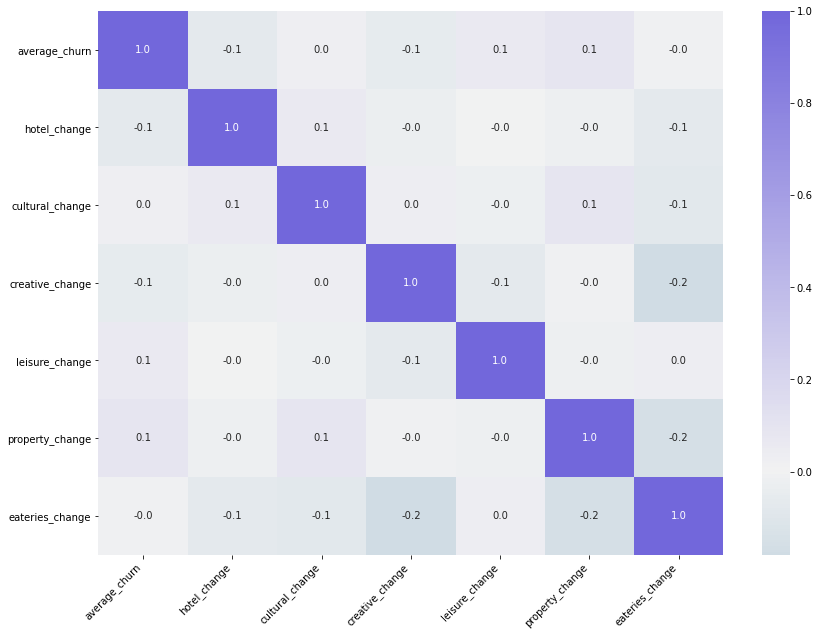

In [61]:
# check for multi-collinearity between variables

fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
cmap = sns.diverging_palette(235.5, 268.1, as_cmap=True)

ax=sns.heatmap(cluster_1.corr(), cmap=cmap, center=0, annot=True, fmt=".1f")
plt.xticks(rotation=45,ha='right',fontsize=10)
plt.savefig(os.path.join("Figures", 'heat_gent_nc_cultural_cluster_raw.png'), transparent=True, dpi=300)


In [62]:
cluster_1.columns

Index(['average_churn', 'hotel_change', 'cultural_change', 'creative_change',
       'leisure_change', 'property_change', 'eateries_change'],
      dtype='object')

In [63]:
# fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(20,20))

# sns.set(style="whitegrid")
# sns.set(font_scale = 1)

# sns.histplot(ax=axs[0,0],data=cluster_1, x="new_builds_pro", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)
# #sns.histplot(ax=axs[0,1],data=cluster_1, x="hotel_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

# sns.histplot(ax=axs[1,0],data=cluster_1, x="children_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)
# sns.histplot(ax=axs[1,1],data=cluster_1, x="age_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

# #sns.histplot(ax=axs[2, 0],data=cluster_1, x="creative_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)
# sns.histplot(ax=axs[2,1],data=cluster_1, x="infrastructure_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

# #sns.histplot(ax=axs[3,0],data=cluster_1, x="creative_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)
# #sns.histplot(ax=axs[3,1],data=cluster_1, x="leisure_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

# #sns.histplot(ax=axs[4,0],data=cluster_1, x="property_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)
# #sns.histplot(ax=axs[4,1],data=cluster_1, x="eateries_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

# sns.histplot(ax=axs[5,0],data=cluster_1, x="average_churn", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

# plt.tight_layout()

# plt.legend() 

# plt.savefig(os.path.join("Figures", 'hist_gent_cluster_raw.png'), transparent=True, dpi=300)

# plt.show()

# 6.2 Transform

In [64]:
# applying cube root transformation to data variables

cluster_1_cubeRoot = np.cbrt(cluster_1)

In [65]:
# fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(20,20))

# sns.set(style="whitegrid")
# sns.set(font_scale = 1)

# sns.histplot(ax=axs[0,0],data=cluster_1_cubeRoot, x="new_builds_pro", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)
# sns.histplot(ax=axs[0,1],data=cluster_1_cubeRoot, x="hotel_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

# sns.histplot(ax=axs[1,0],data=cluster_1_cubeRoot, x="children_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)
# sns.histplot(ax=axs[1,1],data=cluster_1_cubeRoot, x="age_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

# sns.histplot(ax=axs[2, 0],data=cluster_1_cubeRoot, x="creative_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)
# sns.histplot(ax=axs[2,1],data=cluster_1_cubeRoot, x="infrastructure_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

# sns.histplot(ax=axs[3,0],data=cluster_1_cubeRoot, x="creative_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)
# sns.histplot(ax=axs[3,1],data=cluster_1_cubeRoot, x="leisure_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

# sns.histplot(ax=axs[4,0],data=cluster_1_cubeRoot, x="property_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)
# sns.histplot(ax=axs[4,1],data=cluster_1_cubeRoot, x="eateries_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

# sns.histplot(ax=axs[5,0],data=cluster_1_cubeRoot, x="average_churn", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

# plt.tight_layout()

# plt.legend() 

# plt.savefig(os.path.join("Figures", 'hist_gent_cluster_raw.png'), transparent=True, dpi=300)

# plt.show()

In [66]:
# applying the Yeo-Johnson transformation to data variables

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
pt.fit(cluster_1)

cluster_1_yeoJohnson = pt.transform(cluster_1)

In [67]:
cluster_1_yeoJohnson = pd.DataFrame(cluster_1_yeoJohnson, index = cluster_1.index, columns = cluster_1.columns)


In [68]:
cluster_1_yeoJohnson.head()


,average_churn,hotel_change,cultural_change,creative_change,leisure_change,property_change,eateries_change
LSOA11CD,,,,,,,
E01023985,-0.498199,-0.197649,-0.15411,-0.037689,0.896723,-0.076306,-0.165504
E01023986,0.725370,-1.001867,0.64969,-1.737055,0.161118,-1.702214,0.799159
E01023988,-0.236439,1.684981,-0.15411,-0.079539,0.048215,-0.357894,-0.117591
E01023992,1.185870,0.164286,-0.15411,0.812215,0.893921,0.590050,-0.979137
E01023996,-0.048483,-0.077718,-0.15411,-0.966990,-0.033403,-0.679537,0.542527


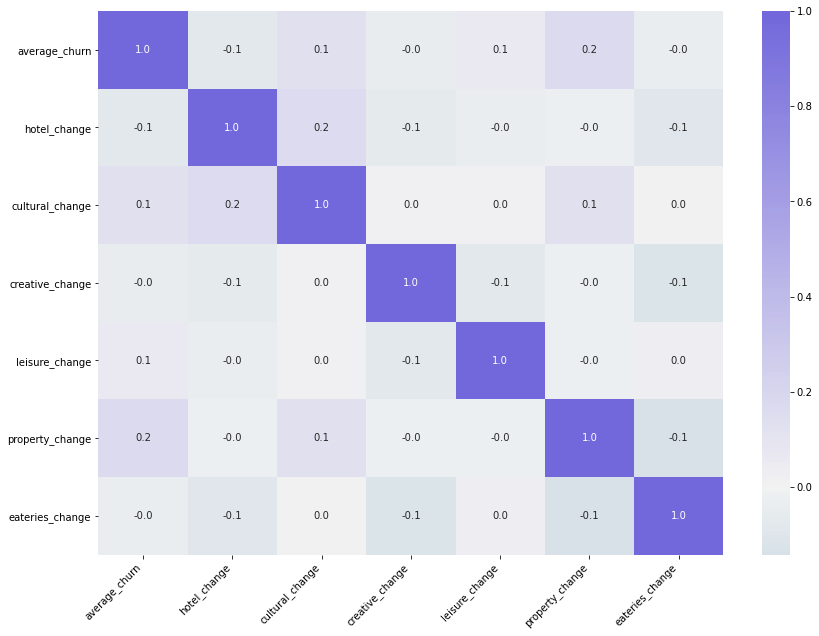

In [69]:
# check for multi-collinearity between variables
# check for multi-collinearity between variables

fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
cmap = sns.diverging_palette(235.5, 268.1, as_cmap=True)
#cmap = sns.diverging_palette(204,252, as_cmap=True)

ax=sns.heatmap(cluster_1_yeoJohnson.corr(), cmap=cmap, center=0, annot=True, fmt=".1f")
plt.xticks(rotation=45,ha='right',fontsize=10)

plt.savefig(os.path.join("Figures", 'heat_gent_nc_cultural_cluster_yeo.png'), transparent=True, dpi=300)

In [70]:
# applying the inverse hyperbolic sine transformation to data variables

cluster_1_invSine = np.arcsinh(cluster_1)

In [71]:
# fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(20,20))

# sns.set(style="whitegrid")
# sns.set(font_scale = 1)

# sns.histplot(ax=axs[0,0],data=cluster_1_invSine, x="new_builds_pro", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)
# sns.histplot(ax=axs[0,1],data=cluster_1_invSine, x="hotel_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

# sns.histplot(ax=axs[1,0],data=cluster_1_invSine, x="children_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)
# sns.histplot(ax=axs[1,1],data=cluster_1_invSine, x="age_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

# sns.histplot(ax=axs[2, 0],data=cluster_1_invSine, x="creative_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)
# sns.histplot(ax=axs[2,1],data=cluster_1_invSine, x="infrastructure_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

# sns.histplot(ax=axs[3,0],data=cluster_1_invSine, x="creative_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)
# sns.histplot(ax=axs[3,1],data=cluster_1_invSine, x="leisure_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

# sns.histplot(ax=axs[4,0],data=cluster_1_invSine, x="property_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)
# sns.histplot(ax=axs[4,1],data=cluster_1_invSine, x="eateries_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

# sns.histplot(ax=axs[5,0],data=cluster_1_invSine, x="average_churn", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

# plt.tight_layout()

# plt.legend() 

# plt.savefig(os.path.join("Figures", 'hist_gent_cluster_raw.png'), transparent=True, dpi=300)

# plt.show()

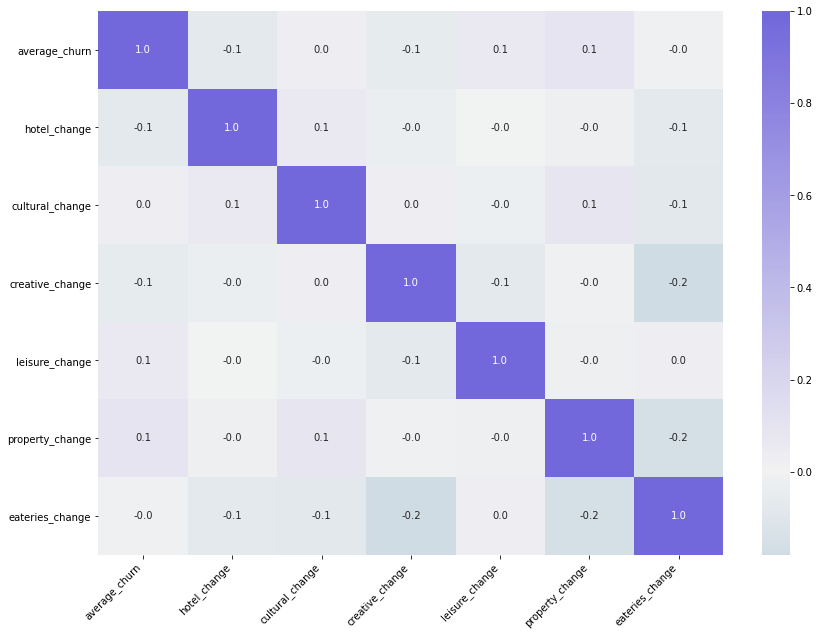

In [72]:
# check for multi-collinearity between variables

fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
cmap = sns.diverging_palette(235.5, 268.1, as_cmap=True)
#cmap = sns.diverging_palette(204,252, as_cmap=True)

ax=sns.heatmap(cluster_1_invSine.corr(), cmap=cmap, center=0, annot=True, fmt=".1f")
plt.xticks(rotation=45,ha='right',fontsize=10)

plt.savefig(os.path.join("Figures", 'heat_gent_nc_cultural_cluster_invsine.png'), transparent=True, dpi=300)

# 6.3 Scaling

In [73]:
# applying z-score standardisation on all 4 datasets

from scipy.stats import zscore


cluster_1_noTrans = cluster_1[:]
cluster_1_noTrans_zscore = cluster_1_noTrans.apply(zscore)
cluster_1_cubeRoot_zscore = cluster_1_cubeRoot.apply(zscore)
cluster_1_yeoJohnson_zscore = cluster_1_yeoJohnson.apply(zscore)
cluster_1_invSine_zscore = cluster_1_invSine.apply(zscore)

In [74]:
# applying RobustScaler (inter-quartile range standardisation) on all 4 datasets

from sklearn.preprocessing import RobustScaler

transformer1 = RobustScaler().fit(cluster_1_noTrans)
cluster_1_noTrans_robust = transformer1.transform(cluster_1_noTrans)
cluster_1_noTrans_robust = pd.DataFrame(cluster_1_noTrans_robust, index = cluster_1_noTrans.index, columns = cluster_1_noTrans.columns)


transformer2 = RobustScaler().fit(cluster_1_cubeRoot)
cluster_1_cubeRoot_robust = transformer2.transform(cluster_1_cubeRoot)
cluster_1_cubeRoot_robust = pd.DataFrame(cluster_1_cubeRoot_robust, index = cluster_1_cubeRoot.index, columns = cluster_1_cubeRoot.columns)


transformer3 = RobustScaler().fit(cluster_1_yeoJohnson)
cluster_1_yeoJohnson_robust = transformer3.transform(cluster_1_yeoJohnson)
cluster_1_yeoJohnson_robust = pd.DataFrame(cluster_1_yeoJohnson_robust, index = cluster_1_yeoJohnson.index, columns = cluster_1_yeoJohnson.columns)


transformer4 = RobustScaler().fit(cluster_1_invSine)
cluster_1_invSine_robust = transformer4.transform(cluster_1_invSine)
cluster_1_invSine_robust = pd.DataFrame(cluster_1_invSine_robust, index = cluster_1_invSine.index, columns = cluster_1_invSine.columns)

In [75]:
# applying RobustScaler (inter-decile range standardisation) on all 4 datasets

transformer5 = RobustScaler(quantile_range=(10.0, 90.0)).fit(cluster_1_noTrans)
cluster_1_noTrans_decile = transformer5.transform(cluster_1_noTrans)
cluster_1_noTrans_decile = pd.DataFrame(cluster_1_noTrans_decile, index = cluster_1_noTrans.index, columns = cluster_1_noTrans.columns)


transformer6 = RobustScaler(quantile_range=(10.0, 90.0)).fit(cluster_1_cubeRoot)
cluster_1_cubeRoot_decile = transformer6.transform(cluster_1_cubeRoot)
cluster_1_cubeRoot_decile = pd.DataFrame(cluster_1_cubeRoot_decile, index = cluster_1_cubeRoot.index, columns = cluster_1_cubeRoot.columns)


transformer7 = RobustScaler(quantile_range=(10.0, 90.0)).fit(cluster_1_yeoJohnson)
cluster_1_yeoJohnson_decile = transformer7.transform(cluster_1_yeoJohnson)
cluster_1_yeoJohnson_decile = pd.DataFrame(cluster_1_yeoJohnson_decile, index = cluster_1_yeoJohnson.index, columns = cluster_1_yeoJohnson.columns)


transformer8 = RobustScaler(quantile_range=(10.0, 90.0)).fit(cluster_1_invSine)
cluster_1_invSine_decile = transformer8.transform(cluster_1_invSine)
cluster_1_invSine_decile = pd.DataFrame(cluster_1_invSine_decile, index = cluster_1_invSine.index, columns = cluster_1_invSine.columns)

In [76]:
# check for heavily-skewed variables (i.e. skewness scores beyond +/- 1)

# df_full = [cluster_1_noTrans_zscore, cluster_1_cubeRoot_zscore, cluster_1_yeoJohnson_zscore, cluster_1_invSine_zscore, cluster_1_noTrans_robust, cluster_1_cubeRoot_robust, cluster_1_yeoJohnson_robust, cluster_1_invSine_robust, cluster_1_noTrans_decile, cluster_1_cubeRoot_decile, cluster_1_yeoJohnson_decile, cluster_1_invSine_decile]
# df_full_name = ["cluster_1_noTrans_zscore", "cluster_1_cubeRoot_zscore", "cluster_1_yeoJohnson_zscore", "cluster_1_invSine_zscore", "cluster_1_noTrans_robust", "cluster_1_cubeRoot_robust", "cluster_1_yeoJohnson_robust", "cluster_1_invSine_robust", "cluster_1_noTrans_decile", "cluster_1_cubeRoot_decile", "cluster_1_yeoJohnson_decile", "cluster_1_invSine_decile"]

# for method in range(len(df_full)):
#     counter = 0
#     for col in range(0,8):
#         if df_full[method][df_full[method].columns[col]].skew() > 1:
#             counter += 1
#         elif df_full[method][df_full[method].columns[col]].skew() <- 1:
#             counter += 1
#     print(str(df_full_name[method]) + " has " + str(counter) + " variables with skew >1 or <-1 \n")

For n_clusters = 2 The average silhouette_score is : 0.3888150839261336
For n_clusters = 3 The average silhouette_score is : 0.27901803777993495
For n_clusters = 4 The average silhouette_score is : 0.2481997239241096
For n_clusters = 5 The average silhouette_score is : 0.26522499966072294
For n_clusters = 6 The average silhouette_score is : 0.26664793884002597
For n_clusters = 7 The average silhouette_score is : 0.194536185405091
For n_clusters = 8 The average silhouette_score is : 0.16792430217294188
For n_clusters = 9 The average silhouette_score is : 0.20251353526011662
For n_clusters = 10 The average silhouette_score is : 0.21771363982035974


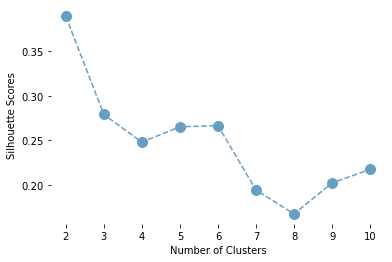

In [77]:
# check and plot silhouette scores to determine the optimal number of clusters

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
Sum_of_squared_distances = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(cluster_1)
    Sum_of_squared_distances.append(clusterer.inertia_)
    
    silhouette_avg = silhouette_score(cluster_1, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

clusters = pd.DataFrame(silhouette_scores, index=None).reset_index().rename(columns={"index":"Cluster",0:"silhouette_score"})

plt.plot(range_n_clusters, silhouette_scores, 'o--', color="#669EC4", ms=10)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Scores')
plt.savefig(os.path.join("Figures", 'line_nc_cultural_cluster_sil.png'), transparent=True, dpi=300)
plt.show()

# 6.4 Cluster

In [78]:
permutation = ["yeoJohnson-zscore", "yeoJohnson-robust(interquartile)","yeoJohnson-robust(interdecile)", "cubeRoot-zscore", "cubeRoot-robust(interquartile)","cubeRoot-robust(interdecile)","invSine-zscore", "invSine-robust(interquartile)", "invSine-robust(interdecile)"]
calinski_harabasz_scores = []

In [79]:
n_clusters = 3

In [80]:
# k-means clustering for yeo-johnson dataset permutations

cluster_1_yeoJohnson_zscore_kmeans = KMeans(n_clusters=n_clusters, init = "k-means++", random_state=0, n_init=5000, max_iter=50000).fit(cluster_1_yeoJohnson_zscore)
cluster_1_yeoJohnson_robust_kmeans = KMeans(n_clusters=n_clusters, init = "k-means++", random_state=0, n_init=5000, max_iter=50000).fit(cluster_1_yeoJohnson_robust)
cluster_1_yeoJohnson_decile_kmeans = KMeans(n_clusters=n_clusters, init = "k-means++", random_state=0, n_init=5000, max_iter=50000).fit(cluster_1_yeoJohnson_decile)

cluster_1_yeoJohnson_zscore_labels = cluster_1_yeoJohnson_zscore_kmeans.labels_
cluster_1_yeoJohnson_robust_labels = cluster_1_yeoJohnson_robust_kmeans.labels_
cluster_1_yeoJohnson_decile_labels = cluster_1_yeoJohnson_decile_kmeans.labels_

In [81]:
cluster_1_yJ_zscore_original = cluster_1[:]
cluster_1_yJ_zscore_original["cluster_1_yeoJohnson_zscore_labels"]=cluster_1_yeoJohnson_zscore_labels

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [82]:
cluster_1_yJ_robust_original = cluster_1[:]
cluster_1_yJ_robust_original["cluster_1_yeoJohnson_robust_labels"]=cluster_1_yeoJohnson_robust_labels

In [83]:
cluster_1_yJ_decile_original = cluster_1[:]
cluster_1_yJ_decile_original["cluster_1_yeoJohnson_decile_labels"]=cluster_1_yeoJohnson_decile_labels

In [84]:
# measuring the performance for yeo-johnson dataset permutations

from sklearn import metrics
from sklearn.metrics import pairwise_distances

print(metrics.calinski_harabasz_score(cluster_1_yJ_zscore_original, cluster_1_yeoJohnson_zscore_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_1_yJ_zscore_original, cluster_1_yeoJohnson_zscore_labels))

print(metrics.calinski_harabasz_score(cluster_1_yJ_robust_original, cluster_1_yeoJohnson_robust_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_1_yJ_robust_original, cluster_1_yeoJohnson_robust_labels))

print(metrics.calinski_harabasz_score(cluster_1_yJ_decile_original, cluster_1_yeoJohnson_decile_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_1_yJ_decile_original, cluster_1_yeoJohnson_decile_labels))

13623.421684172165
3323.715229585883
2435.2640633256033


In [85]:
# k-means clustering for cube-root dataset permutations

cluster_1_cubeRoot_zscore_kmeans = KMeans(n_clusters=n_clusters, init = "k-means++", random_state=0, n_init=5000, max_iter=50000).fit(cluster_1_cubeRoot_zscore)
cluster_1_cubeRoot_robust_kmeans = KMeans(n_clusters=n_clusters, init = "k-means++", random_state=0, n_init=5000, max_iter=50000).fit(cluster_1_cubeRoot_robust)
cluster_1_cubeRoot_decile_kmeans = KMeans(n_clusters=n_clusters, init = "k-means++", random_state=0, n_init=5000, max_iter=50000).fit(cluster_1_cubeRoot_decile)

cluster_1_cubeRoot_zscore_labels = cluster_1_cubeRoot_zscore_kmeans.labels_
cluster_1_cubeRoot_robust_labels = cluster_1_cubeRoot_robust_kmeans.labels_
cluster_1_cubeRoot_decile_labels = cluster_1_cubeRoot_decile_kmeans.labels_

In [86]:
cluster_1_cB_zscore_original = cluster_1[:]
cluster_1_cB_zscore_original["cluster_1_cubeRoot_zscore_labels"]=cluster_1_cubeRoot_zscore_labels

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [87]:
cluster_1_cB_robust_original = cluster_1[:]
cluster_1_cB_robust_original["cluster_1_cubeRoot_robust_labels"]=cluster_1_cubeRoot_robust_labels

In [88]:
cluster_1_cB_decile_original = cluster_1[:]
cluster_1_cB_decile_original["cluster_1_cubeRoot_decile_labels"]=cluster_1_cubeRoot_decile_labels


In [89]:
# measuring the performance for cube-root dataset permutations

print(metrics.calinski_harabasz_score(cluster_1_cB_zscore_original, cluster_1_cubeRoot_zscore_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_1_cB_zscore_original, cluster_1_cubeRoot_zscore_labels))

print(metrics.calinski_harabasz_score(cluster_1_cB_robust_original, cluster_1_cubeRoot_robust_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_1_cB_robust_original, cluster_1_cubeRoot_robust_labels))

print(metrics.calinski_harabasz_score(cluster_1_cB_decile_original, cluster_1_cubeRoot_decile_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_1_cB_decile_original, cluster_1_cubeRoot_decile_labels))

14120.261476526943
10937.785031536918
14209.301238648386


In [90]:
# k-means clustering for inverse sine dataset permutations

cluster_1_invSine_zscore_kmeans = KMeans(n_clusters=n_clusters, init = "k-means++", random_state=0, n_init=5000, max_iter=50000).fit(cluster_1_invSine_zscore)
cluster_1_invSine_robust_kmeans = KMeans(n_clusters=n_clusters, init = "k-means++", random_state=0, n_init=5000, max_iter=50000).fit(cluster_1_invSine_robust)
cluster_1_invSine_decile_kmeans = KMeans(n_clusters=n_clusters, init = "k-means++", random_state=0, n_init=5000, max_iter=50000).fit(cluster_1_invSine_decile)

cluster_1_invSine_zscore_labels = cluster_1_invSine_zscore_kmeans.labels_
cluster_1_invSine_robust_labels = cluster_1_invSine_robust_kmeans.labels_
cluster_1_invSine_decile_labels = cluster_1_invSine_decile_kmeans.labels_

In [91]:
cluster_1_iS_zscore_original = cluster_1[:]
cluster_1_iS_zscore_original["cluster_1_invSine_zscore_labels"]=cluster_1_invSine_zscore_labels

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [92]:
cluster_1_iS_robust_original = cluster_1[:]
cluster_1_iS_robust_original["cluster_1_invSine_robust_labels"]=cluster_1_invSine_robust_labels

In [93]:
cluster_1_iS_decile_original = cluster_1[:]
cluster_1_iS_decile_original["cluster_1_invSine_decile_labels"]=cluster_1_invSine_decile_labels

In [94]:
# measuring the performance for inverse sine dataset permutations

print(metrics.calinski_harabasz_score(cluster_1_iS_zscore_original, cluster_1_invSine_zscore_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_1_iS_zscore_original, cluster_1_invSine_zscore_labels))

print(metrics.calinski_harabasz_score(cluster_1_iS_robust_original, cluster_1_invSine_robust_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_1_iS_robust_original, cluster_1_invSine_robust_labels))

print(metrics.calinski_harabasz_score(cluster_1_iS_decile_original, cluster_1_invSine_decile_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_1_iS_decile_original, cluster_1_invSine_decile_labels))

8926.802753767657
3785.5222056047974
1907.3379964944697


/tmp/ipykernel_854/3424362739.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(permutation, fontsize=14)
/tmp/ipykernel_854/3424362739.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(0,140,20), fontsize=14)


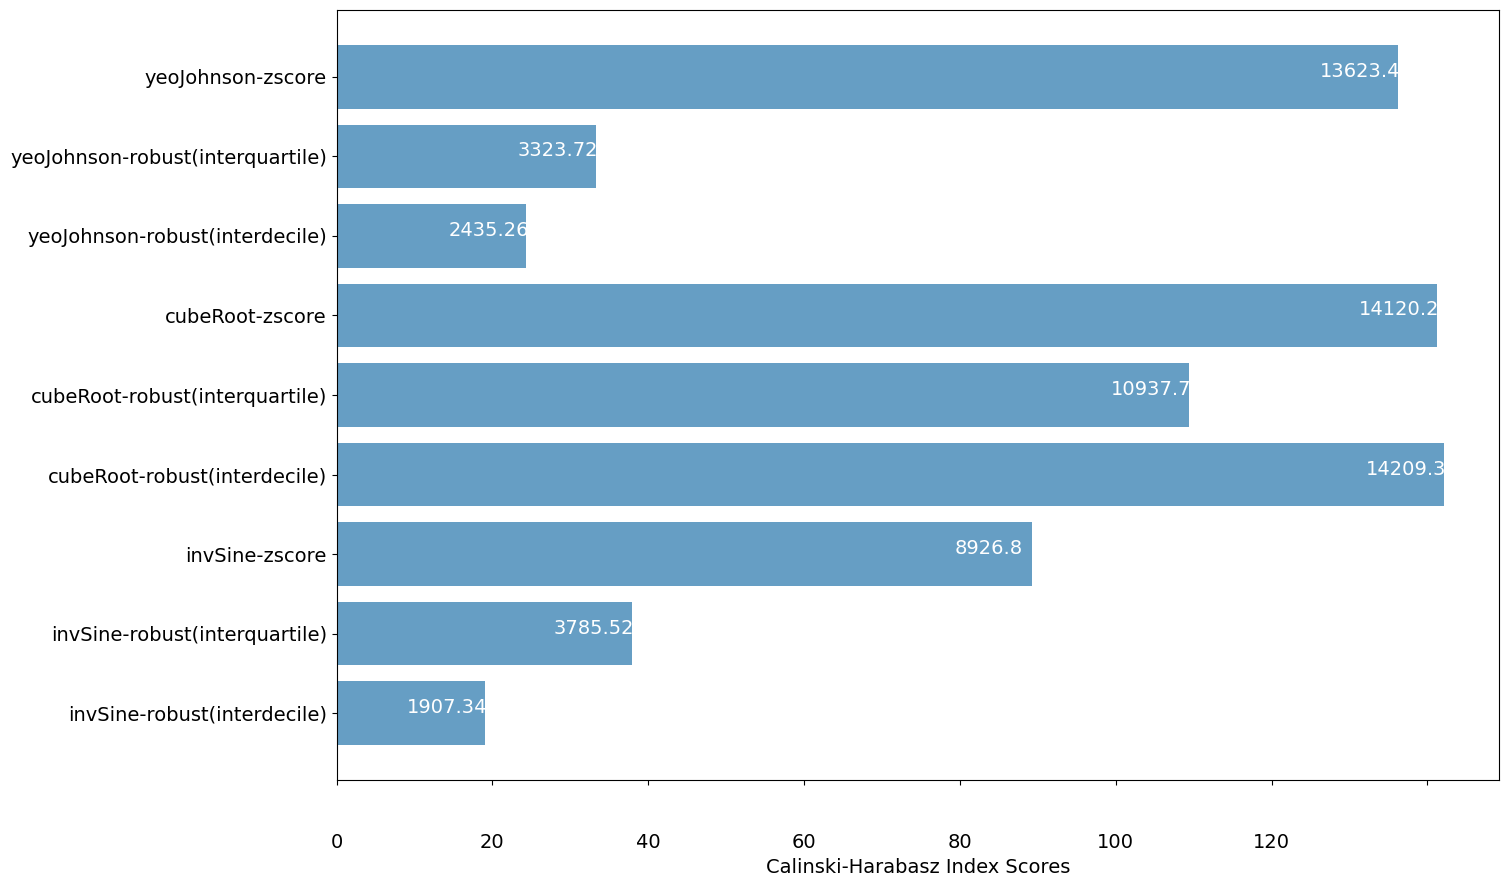

In [124]:
plt.rcParams['axes.facecolor'] = 'white'

fig, ax = plt.subplots(figsize=(15, 10))

bar = plt.barh(permutation, calinski_harabasz_scores, color = ["#669EC4"])

for i in range(len(permutation)):
    plt.text(x = calinski_harabasz_scores[i]-1000, y = i, s = calinski_harabasz_scores[i].round(2), size = 14, color="white")
    
ax.set_yticklabels(permutation, fontsize=14)
ax.set_xticklabels(range(0,140,20), fontsize=14)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Calinski-Harabasz Index Scores',fontsize=14)

plt.savefig(os.path.join("Figures", 'bar_gentnc_cultural__cluster_perf.png'), transparent=True, dpi=300)

plt.show()

In [96]:
permutation

['yeoJohnson-zscore',
 'yeoJohnson-robust(interquartile)',
 'yeoJohnson-robust(interdecile)',
 'cubeRoot-zscore',
 'cubeRoot-robust(interquartile)',
 'cubeRoot-robust(interdecile)',
 'invSine-zscore',
 'invSine-robust(interquartile)',
 'invSine-robust(interdecile)']

In [125]:
# extracting cluster details of the best-performing dataset
#cluster_1_cB_robust_original["cluster_1_cubeRoot_robust_labels"]=cluster_1_cubeRoot_robust_labels
cluster_1_cB_robust_original.groupby("cluster_1_cubeRoot_robust_labels").size()

cluster_1_cubeRoot_robust_labels
0    76
1    32
2    21
dtype: int64

In [126]:
# appending cluster labels to main dataset

cluster_1_cB_robust_original["cluster_1_cubeRoot_robust_labels"]=cluster_1_cubeRoot_robust_labels

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


# 7. Plot

In [127]:
# creating a new dataset for plotting purposes
#cluster_1_cB_robust_original = cluster_1_cB_robust_original.drop(["average_churn"], axis=1)
radar_1 = cluster_1_cB_robust_original.groupby("cluster_1_cubeRoot_robust_labels").mean().reset_index()

In [128]:
cluster_1_cB_robust_original

,average_churn,hotel_change,cultural_change,creative_change,leisure_change,property_change,eateries_change,cluster_1_cubeRoot_robust_labels
LSOA11CD,,,,,,,,
E01023985,0.0778,-0.002008,0.000000,0.000000,0.032238,-0.000669,-0.001339,0
E01023986,0.1148,-0.007042,0.007463,-0.014085,0.009985,-0.020286,0.017028,1
E01023988,0.0842,0.007183,0.000000,-0.000392,0.006595,-0.004180,-0.000392,0
E01023992,0.1362,0.000000,0.000000,0.008621,0.032153,0.007844,-0.018018,2
E01023996,0.0892,-0.001327,0.000000,-0.008130,0.004148,-0.008130,0.012278,1
...,...,...,...,...,...,...,...,...
E01024853,0.0690,0.000000,0.000000,-0.016234,-0.000722,0.007215,0.000000,1
E01032735,0.0666,0.000000,0.000000,0.000000,0.041667,-0.055556,0.041667,0
E01032813,0.1146,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0


In [129]:
# check the means of the entire dataset

cluster_1_cB_robust_original.mean()

average_churn                       0.098957
hotel_change                       -0.001563
cultural_change                     0.003457
creative_change                     0.001230
leisure_change                      0.005404
property_change                     0.000614
eateries_change                     0.001106
cluster_1_cubeRoot_robust_labels    0.573643
dtype: float64

In [130]:
# appending dataset average values to main dataset

radar_avg = cluster_1_cB_robust_original.drop(columns = ["cluster_1_cubeRoot_robust_labels"]).mean().reset_index()

In [131]:
# rename columns for legibility

radar_avg = radar_avg.rename(columns={"index":"var", 0: "value"})


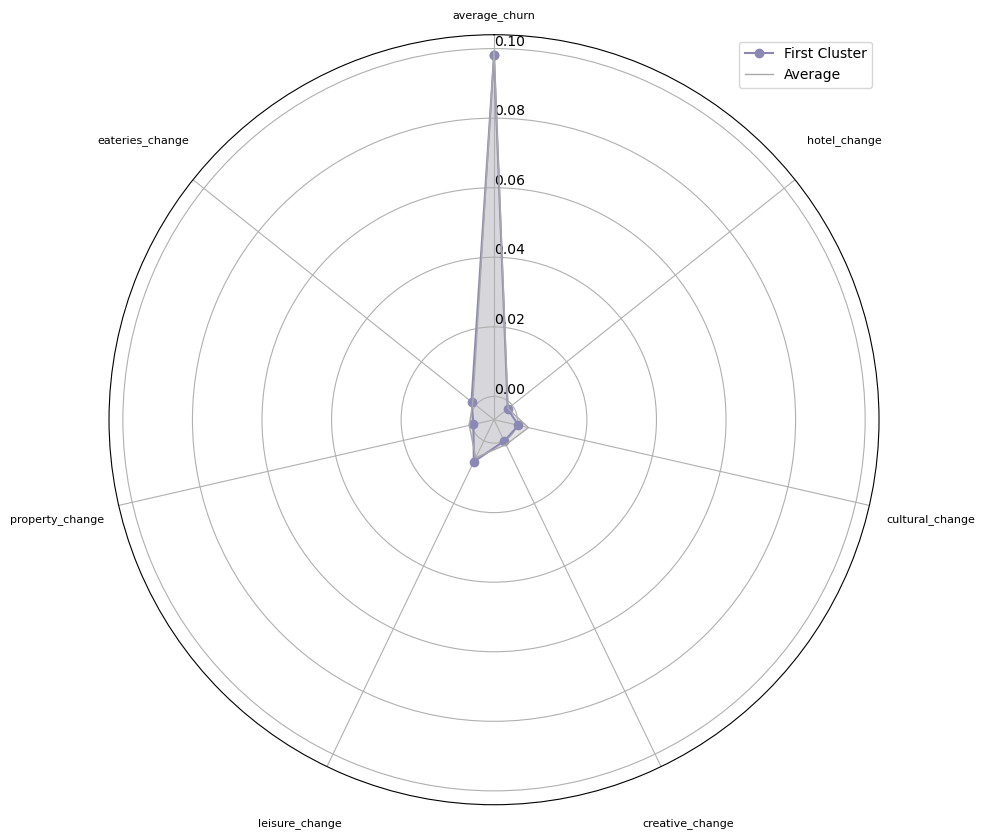

In [132]:
# Reference for code: https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
# plot the 1st cluster
plt.style.use('default')

from math import pi

fig1, ax = plt.subplots()
fig1.set_size_inches(14, 10)

# number of variable
categories=list(radar_1)[1:]
N = len(categories)
 
# plotting for the 1st variable
values=radar_1.iloc[0,1:].values.flatten().tolist()
values += values[:1]
values

# ------- PART 1: Create background
 
# number of variables
categories=list(radar_1)[1:]
N = len(categories)
 
# angles for plotting
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
ax.set_rlabel_position(0)
plt.rcParams['xtick.major.pad']='35'
plt.xticks(angles[:-1], categories, size = 8, rotation=90)
 
# Draw ylabels
#plt.ylim(-1,0.65)
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
 
# Ind1
values=radar_1.iloc[0,1:].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1.5, color = "#8B88B6", linestyle='solid', marker="o", label="First Cluster")
ax.fill(angles, values, '#8B88B6', alpha=0.3)
 
# Ind2
values=radar_avg.iloc[:,1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, color="darkgrey", linestyle='solid', label="Average")
ax.fill(angles, values, 'lightgrey', alpha=0.6)
 
plt.savefig(os.path.join("Figures", 'spider_gent_nc_cultural_cluster1.png'), transparent=True, dpi=300)

# Add legend
plt.legend(loc='upper right')

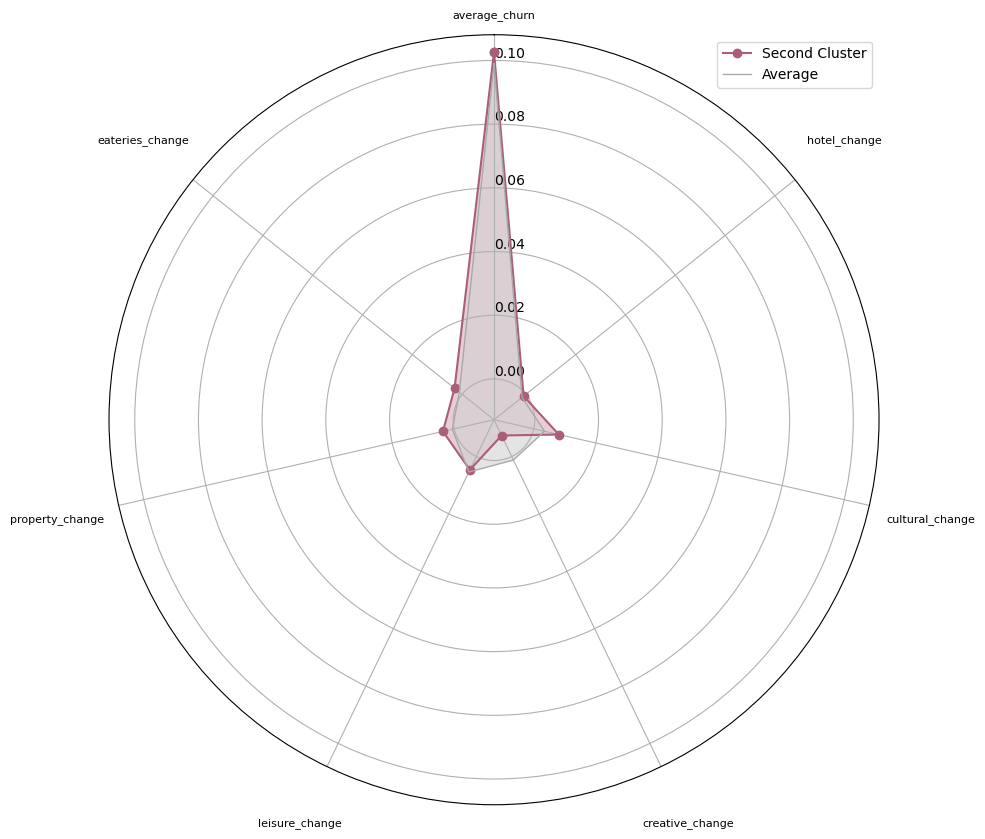

In [133]:
# Reference for code: https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
# plot the 1st cluster
plt.style.use('default')

from math import pi

fig1, ax = plt.subplots()
fig1.set_size_inches(14, 10)

# number of variable
categories=list(radar_1)[1:]
N = len(categories)
 
# plotting for the 1st variable
values=radar_1.iloc[0,1:].values.flatten().tolist()
values += values[:1]
values

# ------- PART 1: Create background
 
# number of variables
categories=list(radar_1)[1:]
N = len(categories)
 
# angles for plotting
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
ax.set_rlabel_position(0)
plt.rcParams['xtick.major.pad']='35'
plt.xticks(angles[:-1], categories, size = 8, rotation=90)
 
# Draw ylabels
#plt.ylim(-1,0.6)
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
 
# Ind1
values=radar_1.iloc[1,1:].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1.5, color = "#AA5E79", linestyle='solid', marker="o", label="Second Cluster")
ax.fill(angles, values, '#AA5E79', alpha=0.3)
 
# Ind2
values=radar_avg.iloc[:,1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, color="darkgrey", linestyle='solid', label="Average")
ax.fill(angles, values, 'lightgrey', alpha=0.6)
 
# Add legend

plt.savefig(os.path.join("Figures", 'spider_gent_nc_cultural_cluster2.png'), transparent=True, dpi=300)

plt.legend(loc='upper right')

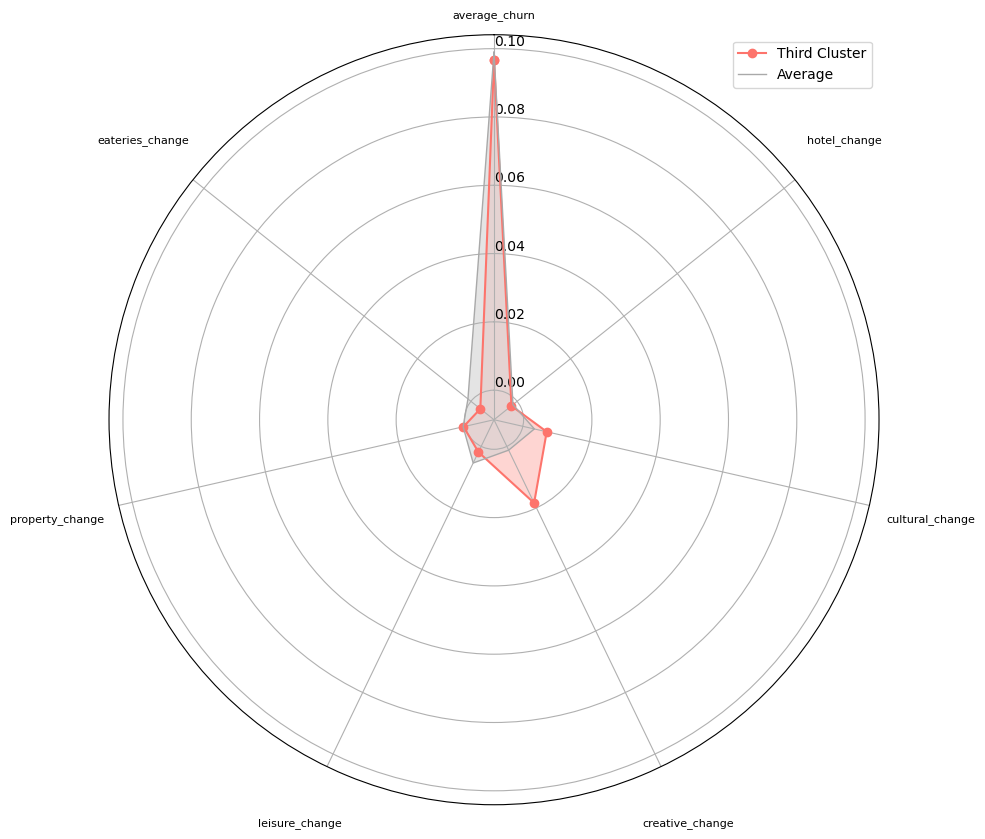

In [134]:
# Reference for code: https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
# plot the 1st cluster
plt.style.use('default')

from math import pi

fig1, ax = plt.subplots()
fig1.set_size_inches(14, 10)

# number of variable
categories=list(radar_1)[1:]
N = len(categories)
 
# plotting for the 1st variable
values=radar_1.iloc[0,1:].values.flatten().tolist()
values += values[:1]
values

# ------- PART 1: Create background
 
# number of variables
categories=list(radar_1)[1:]
N = len(categories)
 
# angles for plotting
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
ax.set_rlabel_position(0)
plt.rcParams['xtick.major.pad']='35'
plt.xticks(angles[:-1], categories, size = 8, rotation=90)
 
# Draw ylabels
#plt.ylim(-1,0.6)
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
 
# Ind1
values=radar_1.iloc[2,1:].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1.5, color = "#fd746c", linestyle='solid', marker="o", label="Third Cluster")
ax.fill(angles, values, '#fd746c', alpha=0.3)
 
# Ind2
values=radar_avg.iloc[:,1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, color="darkgrey", linestyle='solid', label="Average")
ax.fill(angles, values, 'lightgrey', alpha=0.6)

plt.savefig(os.path.join("Figures", 'spider_gent_nc_cultural_cluster3.png'), transparent=True, dpi=300)

 
# Add legend
plt.legend(loc='upper right')

In [135]:
# create new feature column in main dataset to host label categories

cluster_1_yJ_zscore_cat = cluster_1_cB_robust_original[:].reset_index()
cluster_1_yJ_zscore_cat["cluster_1_yJ_zscore_cat"] = ""

In [136]:
cluster_1_yJ_zscore_cat

,LSOA11CD,average_churn,hotel_change,cultural_change,creative_change,leisure_change,property_change,eateries_change,cluster_1_cubeRoot_robust_labels,cluster_1_yJ_zscore_cat
0,E01023985,0.0778,-0.002008,0.000000,0.000000,0.032238,-0.000669,-0.001339,0,
1,E01023986,0.1148,-0.007042,0.007463,-0.014085,0.009985,-0.020286,0.017028,1,
2,E01023988,0.0842,0.007183,0.000000,-0.000392,0.006595,-0.004180,-0.000392,0,
3,E01023992,0.1362,0.000000,0.000000,0.008621,0.032153,0.007844,-0.018018,2,
4,E01023996,0.0892,-0.001327,0.000000,-0.008130,0.004148,-0.008130,0.012278,1,
...,...,...,...,...,...,...,...,...,...,...
124,E01024853,0.0690,0.000000,0.000000,-0.016234,-0.000722,0.007215,0.000000,1,
125,E01032735,0.0666,0.000000,0.000000,0.000000,0.041667,-0.055556,0.041667,0,
126,E01032813,0.1146,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0,
127,E01032820,0.2092,0.000000,0.000000,0.000000,0.056561,-0.001131,0.000000,0,


In [137]:
# parse cluster labels to derive their categories 

cluster_1_yJ_zscore_cat["cluster_1_yJ_zscore_cat"] = "cluster3"

for i in range(len(cluster_1_yJ_zscore_cat)):
    if cluster_1_yJ_zscore_cat.loc[i, "cluster_1_cubeRoot_robust_labels"]==0:
        cluster_1_yJ_zscore_cat.loc[i, "cluster_1_yJ_zscore_cat"]="cluster1"
    if cluster_1_yJ_zscore_cat.loc[i, "cluster_1_cubeRoot_robust_labels"]==1:
        cluster_1_yJ_zscore_cat.loc[i, "cluster_1_yJ_zscore_cat"]="cluster2"


In [138]:
cluster_1_yJ_zscore_cat["cluster_1_cubeRoot_robust_labels"]. value_counts() 

0    76
1    32
2    21
Name: cluster_1_cubeRoot_robust_labels, dtype: int64

In [139]:
lsoa_2011 = gpd.read_file(os.path.join(shapefiles, "LSOA_KENT_2011.shp"))
outline = gpd.read_file(os.path.join(shapefiles, "KENT_OUTLINE.shp"))
Level1Cat = pd.merge(lsoa_2011, lsoa_cats_asc, on="LSOA11CD")

In [140]:
cluster_1_yJ_zscore_cat = pd.merge(lsoa_2011, cluster_1_yJ_zscore_cat, on="LSOA11CD", how="right")

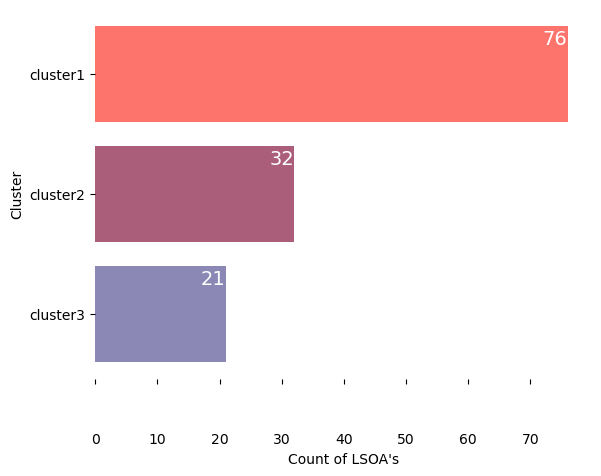

In [141]:
# Plot bar graph of counts

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

# check dataframe

count = pd.DataFrame(cluster_1_yJ_zscore_cat.groupby(cluster_1_yJ_zscore_cat["cluster_1_yJ_zscore_cat"]).size()).reset_index()
count = count.rename(columns={0:"count"}).sort_values(by="count")
count

fig, ax = plt.subplots()

index = ["Cluster 1", "Cluster 2", "Cluster 3"]
bar = plt.barh(count['cluster_1_yJ_zscore_cat'], count['count'], color = [ "#8B88B6", "#AA5E79", "#fd746c" ])

for i, v in enumerate(count["count"]):
    ax.text(v - 4, i + .25, str(v), color='white', size=14)
    
plt.xlabel("Count of LSOA's")
plt.ylabel('Cluster')

plt.savefig(os.path.join("Figures", 'bar_gent_cats_nc_cultural_count.png'), transparent=True, dpi=300)

plt.show()

In [142]:
Level1Cat

,LSOA11CD,LSOA11NM,geometry,Level1Cat_nc
0,E01023985,Ashford 002A,"POLYGON ((595475.182 149369.604, 595475.757 14...",ASC
1,E01023986,Ashford 002B,"POLYGON ((593070.688 147390.312, 593082.375 14...",ASC
2,E01023988,Ashford 001C,"POLYGON ((603642.688 154268.298, 603642.848 15...",ASC
3,E01023992,Ashford 004E,"POLYGON ((599989.000 143004.000, 599988.614 14...",ASC
4,E01023996,Ashford 006C,"POLYGON ((603629.566 141336.437, 603628.938 14...",ASC
...,...,...,...,...
124,E01024853,Tunbridge Wells 006D,"POLYGON ((553649.685 139868.772, 553643.985 13...",ASC
125,E01032735,Swale 013F,"POLYGON ((591072.484 162678.210, 591074.000 16...",ASC
126,E01032813,Ashford 012E,"POLYGON ((598130.503 141718.031, 598101.106 14...",ASC
127,E01032820,Ashford 004I,"POLYGON ((599495.161 143967.606, 599495.250 14...",ASC


/opt/conda/envs/sds2021/lib/python3.9/site-packages/geopandas/plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


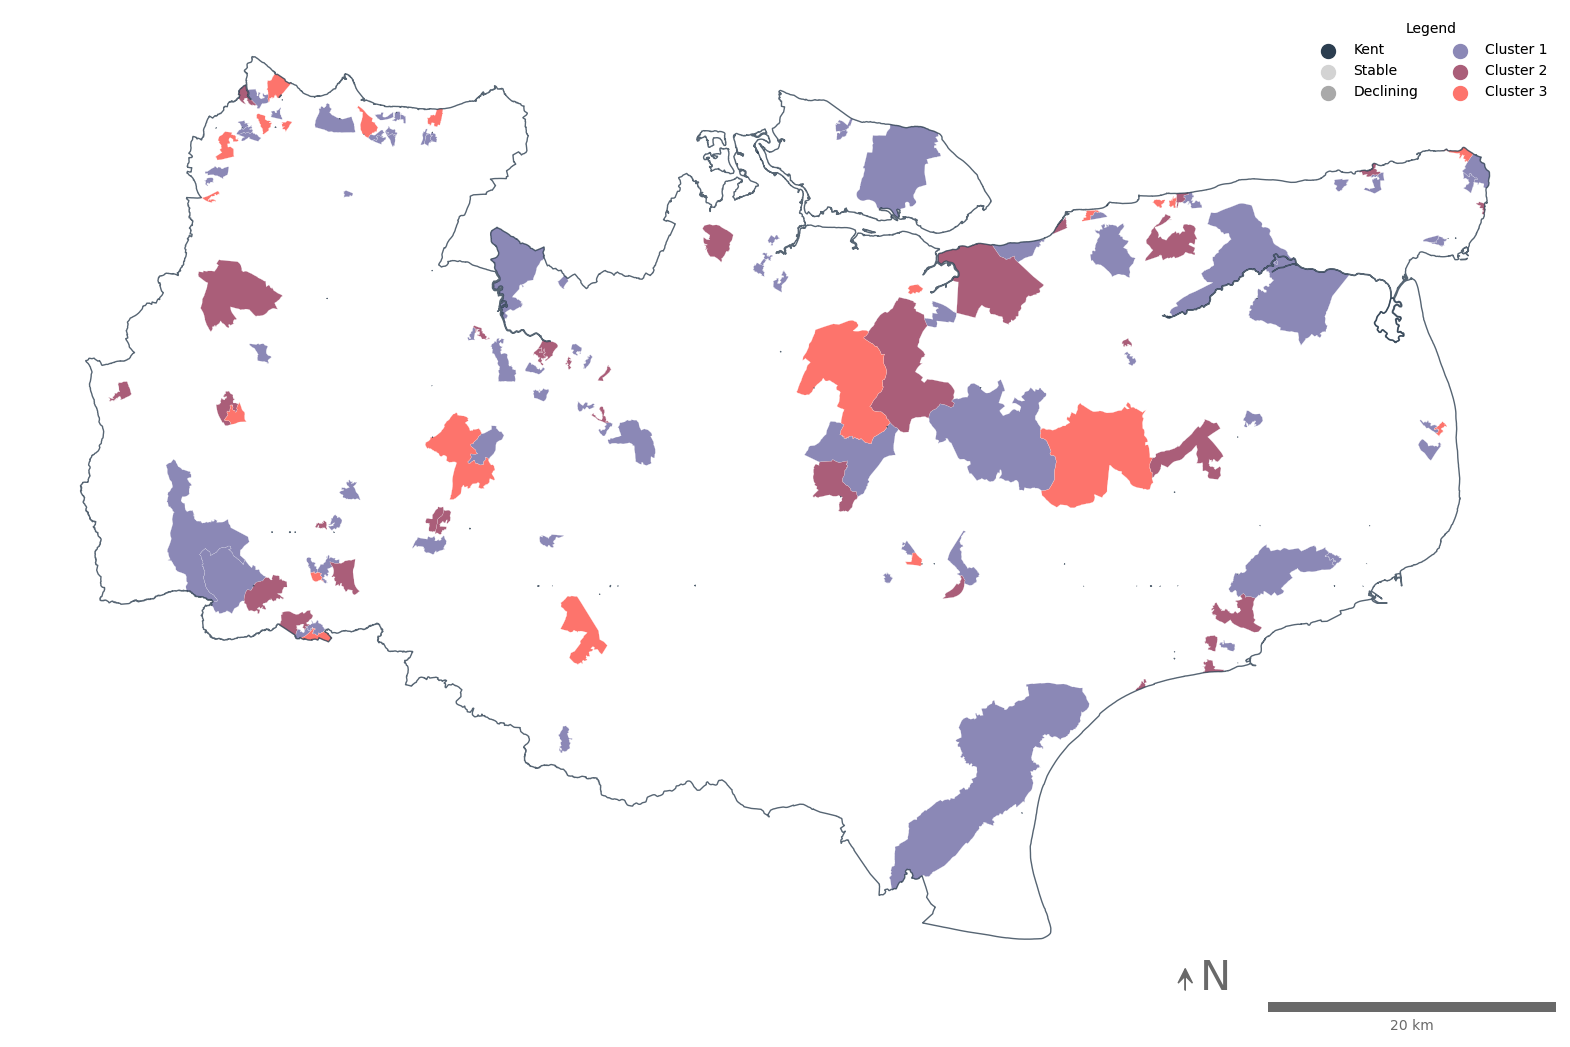

In [143]:
# Filter by status, allowing control over colors of map
stb = Level1Cat.loc[Level1Cat['Level1Cat_nc'] == "STB"]
dec = Level1Cat.loc[Level1Cat['Level1Cat_nc'] == "DEC"]
clus1 = cluster_1_yJ_zscore_cat.loc[cluster_1_yJ_zscore_cat['cluster_1_yJ_zscore_cat'] == "cluster1"]
clus2 = cluster_1_yJ_zscore_cat.loc[cluster_1_yJ_zscore_cat['cluster_1_yJ_zscore_cat'] == "cluster2"]
clus3 = cluster_1_yJ_zscore_cat.loc[cluster_1_yJ_zscore_cat['cluster_1_yJ_zscore_cat'] == "cluster3"]

# Set axes
fig, ax = plt.subplots(figsize=(20,20))
ax.set_aspect('equal')
ax.set_facecolor("white")

ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False) 

# Plot outlines of LSOA'S 
lsoa_2011.plot(ax=ax, edgecolor="white", facecolor="None", alpha=0.8, zorder=10, linewidth=0.1)

# Plot outline of Kent
outline.plot(ax=ax, edgecolor="#2c3e50", facecolor="None", alpha=0.8, zorder=10, linewidth=1)

# Add basemap
#ctx.add_basemap(ax, crs=kent_2011.crs.to_string(), source=ctx.providers.CartoDB.Positron)

# Add scale bar
# Points on the sane lattitude, one longitude apart
points = gpd.GeoSeries([Point(51.5072, 0.1276), Point(52.5072, 0.1276)], crs=4326)
# Calculate difference
distance_meters = points[0].distance(points[1])
# Plot
ax.add_artist(ScaleBar(distance_meters, color="dimgray", location="lower right")) 

# Add north arrow

ax.text(x=620000, y=113000,s='N', fontsize=30, color="dimgray")
ax.arrow(619000, 113000, 0, 1000, length_includes_head=True, head_width=1000, head_length=500, overhang=2, zorder=100, color="dimgray")

stb.plot(ax=ax, facecolor="lightgrey")
dec.plot(ax=ax, facecolor="darkgrey", alpha=0.7)
clus1.plot(ax=ax, facecolor="#8B88B6")
clus2.plot(ax=ax, facecolor="#AA5E79")
clus3.plot(ax=ax, facecolor="#fd746c")

# Add legend
l1 = plt.scatter([],[], s=100, marker='o', color='#2c3e50')
l2 = plt.scatter([],[], s=100, marker='o', color='lightgrey')
l3 = plt.scatter([],[], s=100, marker='o', color='darkgrey')
l4 = plt.scatter([],[], s=100, marker='o', color='#8B88B6')
l5 = plt.scatter([],[], s=100, marker='o', color='#AA5E79')
l6 = plt.scatter([],[], s=100, marker='o', color='#fd746c')

labels = ["Kent", "Stable","Declining", "Cluster 1", "Cluster 2", "Cluster 3"]
legend = ax.legend([l1, l2,l3, l4, l5, l6], labels, loc="upper right", title='Legend', facecolor="white", edgecolor="white", ncol=2)    
ax.add_artist(legend)

# Add title
#ax.set_title("Categories of Gentrification for LSOAs in Kent", fontdict={'fontsize': '20','fontweight' : '3'}) 
   
plt.savefig(os.path.join("Figures", 'map_gent_nc_cultural_cluster.png'), transparent=True, dpi=300)

# Show map
plt.show()
